In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
train=pd.read_csv("train.csv")
test_=pd.read_csv("test.csv")

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
test_.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


因为test数据标签未给，为让我们预测的数据，所以我们对train data进行分析

In [6]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
id               1000 non-null int64
battery_power    1000 non-null int64
blue             1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
fc               1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
talk_time        1000 non-null int64
three_g          1000 non-null int64
touch_screen     1000 non-null int64
wifi             1000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 164.1 KB


In [7]:
train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [8]:
train = train.dropna(axis=0)
train.drop_duplicates(inplace=True)
train.index=range(train.shape[0])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [9]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


我们将原数据进行缺失值处理，重复值处理，异常值处理后，得到了可用于分析的数据，发现label为4分类特征0,1,2,3各500个,为非常均衡的数据，接下来进行特征选择，与模型判断

将label提取出，为y，然后进行训练测试数据划分

In [11]:
y=train.iloc[:,-1]

In [12]:
train=train.drop(columns='price_range')

我们观察到，数据均为数值型变量，因此不用进行ordinary encode或者onehot encoder，现在我们观察数据分布

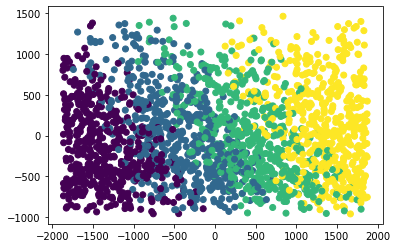

In [13]:
x = PCA(2).fit_transform(train)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

由上图我们发现，数据是线性可分的，因此除了尝试集成算法外，线性分类算法（svm，logistics）

下面我们对特征进行筛选，将筛选后与未删选的分别代入模型进行准确率的对比

In [14]:
RFC=RFC(n_estimators=100,random_state=0)
train_embedded=SelectFromModel(RFC).fit_transform(train,y)

In [15]:
train_embedded.shape

(2000, 4)

In [16]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train_embedded,y,test_size=0.3)

In [18]:
clf=DecisionTreeClassifier(random_state=0)


In [19]:
clf=clf.fit(xtrain1,ytrain1)
RFC=RFC.fit(xtrain1,ytrain1)

score_c1=clf.score(xtest1,ytest1)
score_r1=RFC.score(xtest1,ytest1)

print("single tree:{}".format(score_c1),
     "random forest:{}".format(score_r1))

single tree:0.865 random forest:0.9033333333333333


In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.3)

In [21]:
lrl2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [22]:
lrl2=lrl2.fit(xtrain,ytrain)
lrl2.coef_

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[-2.70822804e-03,  1.62990429e-01,  6.89320797e-01,
         5.15262658e-01, -4.55403068e-02,  2.43229068e-01,
         3.93462997e-03,  5.29405794e-01,  2.44771714e-02,
         2.65629266e-01,  5.09751464e-02, -2.49200987e-03,
        -7.09721014e-04, -6.21716417e-03,  2.04393096e-01,
        -1.64894569e-02,  5.51014533e-02,  2.27785795e-01,
         7.65259412e-01,  7.15695439e-01],
       [-8.02104730e-05,  2.31445296e-01, -9.15333570e-02,
         1.01595118e-01,  7.97062915e-03,  2.50889222e-02,
         2.81111667e-03,  2.04751076e-01, -8.36354902e-04,
        -8.93532177e-02, -5.86880839e-03,  2.42561869e-04,
        -1.39269943e-04, -5.50556642e-04, -1.25205111e-02,
        -1.21219129e-02,  3.16257230e-02,  1.07741210e-01,
         5.35899356e-02,  8.30122233e-02],
       [-3.41337427e-04, -1.42710672e-01, -2.61100458e-03,
        -2.29874970e-01,  9.55327601e-03, -2.41537262e-01,
        -5.92236226e-03, -2.33973766e-01,  3.30985439e-04,
         3.31198141e-02, -1.7

In [23]:
accuracy_score(lrl2.predict(xtest),ytest)

0.6983333333333334

In [24]:
lrl3=lrl2.fit(xtrain1,ytrain1)
lrl3.coef_

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[-1.25599962e-03, -1.47974700e-03,  2.02098390e-04,
        -3.68138841e-03],
       [ 1.65327350e-05,  2.20928956e-04, -1.38612058e-04,
        -5.53850478e-04],
       [-1.90795233e-05, -8.53336736e-06, -2.81158079e-04,
         4.97928397e-04],
       [ 6.21934969e-04,  8.51150673e-04, -7.75437415e-05,
         2.22662322e-03]])

In [25]:
accuracy_score(lrl3.predict(xtest1),ytest1)

0.7566666666666667

In [26]:
clf=DecisionTreeClassifier(random_state=0)

clf=clf.fit(xtrain,ytrain)
RFC=RFC.fit(xtrain,ytrain)

score_c=clf.score(xtest,ytest)
score_r=RFC.score(xtest,ytest)

print("single tree:{}".format(score_c),
     "random forest:{}".format(score_r))

single tree:0.8166666666666667 random forest:0.8266666666666667


In [ ]:
#交叉验证,慎跑，要50分钟
#rfc_s=cross_val_score(RFC,train,y,cv=10)

In [ ]:
#rfc_s

In [ ]:
#rfc_s.mean()

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [32]:
def train_knn(feature_train,label_train,n_neighbors):
    #Input: feature data frame, label series, model parameters
    #Output: time to train model, trained model
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(feature_train,label_train)
    end = time.time()
    train_time = end-start
    return [train_time,knn]

In [36]:
run_knn = True
feature_train,feature_test,label_train,label_test=train_test_split(train,y,test_size=0.3)

In [48]:
def compute_metrics(feature_test,label_test,test_preds, model):
    
    classification_error = np.mean(np.array(test_preds) != np.array(label_test))
    accuracy = 1-classification_error
    #accuracy = accuracy_score(label_test,test_preds)
    
    #these are not class predictions, they're probabilities so we don't include the
    #time it takes to find them in prediction time
    test_probs = model.predict_proba(feature_test)[:,1]
    #auc = roc_auc_score(label_test,test_probs)
    
    return [accuracy]

def test_model(model, feature_test):
    #Input: test features, a trained model
    #Output: prediction time, test predictions
    start = time.time()
    test_preds = model.predict(feature_test)
    end = time.time()
    prediction_time = end-start
    
    return [prediction_time,test_preds]
    

In [53]:
if run_knn == True:
    
    [train_time, knn] = train_knn(feature_train,label_train,n_neighbors=25)
    print('\nTraining time: {:4f} seconds'.format(train_time))
    
    [prediction_time,test_preds] = test_model(knn,feature_test)
    print('Prediction time: {:4f} seconds'.format(prediction_time))
    
    [accuracy] = compute_metrics(feature_test,label_test,test_preds,knn)
    print('\nAccuracy: {:4f}'.format(accuracy))
    #print('AUC: {:4f}'.format(auc))
    
    row = pd.Series({#'Feature Extraction Train Time':tm_feature_train_improved,
        #'Feature Extraction Test Time':tm_feature_test_improved,
         'Train Time':train_time,
         'Prediction Time':prediction_time,
        'Accuracy':accuracy},name='KNN')
    #model_results_df = model_results_df.append(row)


Training time: 0.005246 seconds
Prediction time: 0.041884 seconds

Accuracy: 0.935000
